In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/Colab Notebooks/small.zip"

In [0]:
train_dir='small/train/'
validation_dir='small/validation/'
test_dir='small/test/'

In [0]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Reshape,AveragePooling2D, SeparableConv2D,Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Reshape,AveragePooling2D, SeparableConv2D,Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

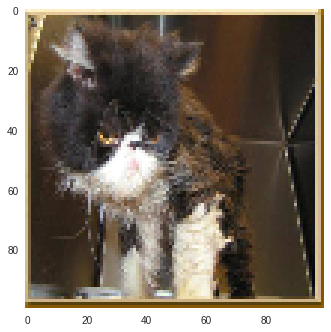

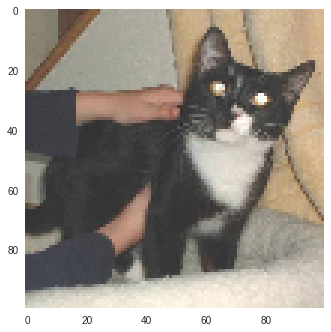

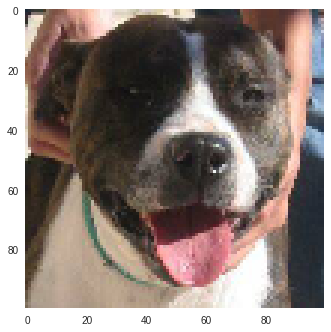

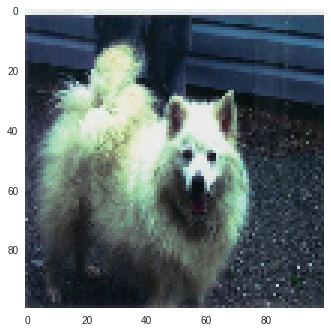

In [6]:
cats_dir=os.path.join(test_dir, 'cats')
fnames = [os.path.join(cats_dir, fname) for fname in os.listdir(cats_dir)][:2]
dogs_dir=os.path.join(test_dir, 'dogs')
fnames.extend([os.path.join(dogs_dir, fname) for fname in os.listdir(dogs_dir)][:2])

# Read the image and resize it
i=0
for img_path in fnames:
  img = image.load_img(img_path, target_size=(100, 100))
  plt.figure(i)
  plt.grid(False)
  imgplot = plt.imshow(img)
  i+=1

plt.show()

In [7]:
INPUT_SIZE=128
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=32

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(INPUT_SIZE, INPUT_SIZE),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(INPUT_SIZE, INPUT_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(INPUT_SIZE, INPUT_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 512 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(monitor='val_acc',patience=3)

BEST_MODEL_FILE='best_model.h5'
mc = ModelCheckpoint(BEST_MODEL_FILE, monitor='val_acc', verbose=1, save_best_only=True)

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//BATCH_SIZE,
      epochs=12,
      callbacks=[es,mc], 
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//BATCH_SIZE)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
16/16 [==============================] - 6s 365ms/step - loss: 0.8027 - acc: 0.4922 - val_loss: 0.6907 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to best_model.h5
Epoch 2/12
16/16 [==============================] - 2s 136ms/step - loss: 0.6960 - acc: 0.4961 - val_loss: 0.7067 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/12
16/16 [==============================] - 2s 145ms/step - loss: 0.6976 - acc: 0.5039 - val_loss: 0.6884 - val_acc: 0.5742

Epoch 00003: val_acc improved from 0.50000 to 0.57422, saving model to best_model.h5
Epoch 4/12
16/16 [==============================] - 2s 144ms/step - loss: 0.6847 - acc: 0.5508 - val_loss: 0.7037 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.57422
Epoch 5/12
16/16 [==============================] - 2s 144ms/step - loss: 0.7185 - acc: 0.5332 - val_loss: 0.6852 - val_acc: 0.5117

Epoch 00005: val_acc

In [11]:
model.load_weights(BEST_MODEL_FILE)
score = model.evaluate_generator(test_generator, steps=test_generator.samples//BATCH_SIZE, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6145691275596619
Test accuracy: 0.68359375


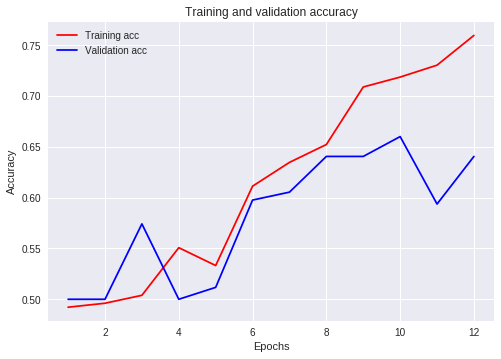

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
from keras.applications import mobilenet,mobilenetv2
net_model=mobilenet
net_description='mobilenet'

INPUT_SHAPE=224

#ImageNet-1000 scores
model = mobilenet.MobileNet(weights='imagenet',input_shape=(INPUT_SHAPE,INPUT_SHAPE,3))

for img_path in fnames:
  img = image.load_img(img_path, target_size=(INPUT_SHAPE, INPUT_SHAPE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = net_model.preprocess_input(x)

  preds = model.predict(x)
  # decode the results into a list of tuples (class, description, probability)
  # (one such list for each sample in the batch)
  print('Predicted:', net_model.decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02123394', 'Persian_cat', 0.93332815), ('n02085782', 'Japanese_spaniel', 0.028648388), ('n02493509', 'titi', 0.0029280127)]
Predicted: [('n02124075', 'Egyptian_cat', 0.48184782), ('n04265275', 'space_heater', 0.07596425), ('n03887697', 'paper_towel', 0.06203251)]
Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.69362617), ('n02093256', 'Staffordshire_bullterrier', 0.30213866), ('n02108089', 'boxer', 0.0035121972)]
Predicted: [('n02111889', 'Samoyed', 0.35682103), ('n02112137', 'chow', 0.28220543), ('n02112350', 'keeshond', 0.25831088)]


In [14]:
#Features
model = mobilenet.MobileNet(weights='imagenet',input_shape=(INPUT_SHAPE,INPUT_SHAPE,3),include_top=False, pooling='avg')

for img_path in fnames:
  img = image.load_img(img_path, target_size=(INPUT_SHAPE, INPUT_SHAPE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = net_model.preprocess_input(x)

  preds = model.predict(x)
  # decode the results into a list of tuples (class, description, probability)
  # (one such list for each sample in the batch)
  print('Predicted:', preds.shape,preds)

17227776/17225924 [==============================] - 0s 0us/step
Predicted: (1, 1024) [[0.0780662  0.58504313 0.         ... 0.0588     0.406071   0.05756857]]
Predicted: (1, 1024) [[0.41229582 0.         0.21032746 ... 0.         1.5459707  1.8505    ]]
Predicted: (1, 1024) [[0.53755236 0.10275265 0.02328793 ... 0.         0.85425806 0.32652634]]
Predicted: (1, 1024) [[0.01726311 0.45783234 0.         ... 0.35604912 0.2093467  0.70704186]]


In [15]:
def net():
    base_model = mobilenet.MobileNet(weights='imagenet',input_shape=(INPUT_SHAPE,INPUT_SHAPE,3),include_top=False, pooling='avg')
    x=base_model.output
    x = Dense(1, activation='sigmoid', use_bias=True)(x)
    model=Model(base_model.inputs, x)
    return model,base_model

train_datagen = ImageDataGenerator(preprocessing_function=net_model.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=net_model.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(INPUT_SHAPE, INPUT_SHAPE),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(INPUT_SHAPE, INPUT_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(INPUT_SHAPE, INPUT_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 512 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
model,base_model=net()
for l in base_model.layers:
    l.trainable=False
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
#model.summary()
mc = ModelCheckpoint(BEST_MODEL_FILE, monitor='val_acc', verbose=1, save_best_only=True)
history1 = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//BATCH_SIZE,
      epochs=12,
      callbacks=[es,mc], 
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//BATCH_SIZE)

Epoch 1/12
16/16 [==============================] - 6s 398ms/step - loss: 0.6027 - acc: 0.6758 - val_loss: 0.3241 - val_acc: 0.8789

Epoch 00001: val_acc improved from -inf to 0.87891, saving model to best_model.h5
Epoch 2/12
16/16 [==============================] - 2s 133ms/step - loss: 0.2935 - acc: 0.9023 - val_loss: 0.2018 - val_acc: 0.9180

Epoch 00002: val_acc improved from 0.87891 to 0.91797, saving model to best_model.h5
Epoch 3/12
16/16 [==============================] - 3s 158ms/step - loss: 0.2125 - acc: 0.9258 - val_loss: 0.1340 - val_acc: 0.9609

Epoch 00003: val_acc improved from 0.91797 to 0.96094, saving model to best_model.h5
Epoch 4/12
16/16 [==============================] - 3s 184ms/step - loss: 0.1776 - acc: 0.9375 - val_loss: 0.1654 - val_acc: 0.9336

Epoch 00004: val_acc did not improve from 0.96094
Epoch 5/12
16/16 [==============================] - 3s 191ms/step - loss: 0.1485 - acc: 0.9551 - val_loss: 0.1023 - val_acc: 0.9688

Epoch 00005: val_acc improved fro

In [17]:
model.load_weights(BEST_MODEL_FILE)
score = model.evaluate_generator(test_generator, steps=test_generator.samples//BATCH_SIZE, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10276634432375431
Test accuracy: 0.97265625
